In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('data/мокрое просеивание все объекты.csv')
df['column'] = df["Размер сухого агрегата"] +' ' +  df["Размеры фракций"]
df = df[['Год',"Тип обработки" ,"повторность","GPS №",	"region", "column","Вес образца, г" ]]
df = df.pivot_table("Вес образца, г",['Год',"Тип обработки" ,"повторность","GPS №",	"region"],"column").reset_index()
df = df[df['Год'].isin([2019,2022])]
df = df[df["region"].isin(["архангельский","урожайное"])]
df = df[~df["GPS №"].isin(["645","647","646"])]
df['key'] = df["region"] + df["Тип обработки"] + df["повторность"].astype(str)
df

column,Год,Тип обработки,повторность,GPS №,region,10-7 1-0.25,10-7 2-1,10-7 3-2,10-7 4-3,10-7 5-4,...,7-5 >5,>10 1-0.25,>10 10-7,>10 2-1,>10 3-2,>10 5-3,>10 7-5,>10 <0.25,>10 >10,key
3,2019,ПП,1,Архангельский,архангельский,4.020,1.740,1.340,1.610,1.300,...,3.090,2.460,0.660,1.420,1.120,2.770,1.660,3.530,6.380,архангельскийПП1
5,2019,ПП,2,Архангельский,архангельский,1.800,1.210,0.540,1.070,2.040,...,1.630,2.610,1.030,1.530,1.550,3.980,1.980,4.280,3.040,архангельскийПП2
7,2019,ПП,3,Архангельский,архангельский,4.730,0.870,1.020,1.600,2.200,...,1.660,2.480,0.380,1.740,1.090,1.980,0.770,3.340,8.220,архангельскийПП3
9,2019,ПП,4,Архангельский,архангельский,3.470,2.440,0.890,1.730,2.290,...,2.780,3.800,0.220,2.640,1.270,2.350,0.700,4.090,4.930,архангельскийПП4
11,2019,ПП,5,Архангельский,архангельский,4.950,1.640,1.210,1.610,2.180,...,3.920,4.270,1.670,2.130,1.340,3.760,2.460,3.100,1.270,архангельскийПП5
13,2019,ТТ,1,Архангельский,архангельский,6.990,1.340,1.020,0.780,0.570,...,1.320,6.840,0.030,4.190,0.690,1.340,0.080,5.370,1.460,архангельскийТТ1
15,2019,ТТ,2,Архангельский,архангельский,3.090,4.340,1.510,1.020,0.970,...,1.580,5.010,0.040,3.160,1.480,2.410,1.210,6.670,0.020,архангельскийТТ2
17,2019,ТТ,3,Архангельский,архангельский,6.630,2.190,1.330,2.130,1.230,...,1.000,5.230,0.000,4.570,1.910,1.790,0.100,5.080,1.320,архангельскийТТ3
19,2019,ТТ,4,Архангельский,архангельский,8.760,1.420,1.040,1.280,0.170,...,1.940,4.880,0.030,4.790,0.910,1.080,0.140,5.300,2.870,архангельскийТТ4
21,2019,ТТ,5,Архангельский,архангельский,6.760,1.750,0.800,0.710,0.570,...,2.140,5.320,0.240,3.200,0.950,1.530,0.530,4.970,3.260,архангельскийТТ5


In [4]:
suh = pd.read_csv('data/сухое просеивание все объекты.csv')
suh = suh[['Год',"Тип обработки" ,"Поврторность","GPS №",	"region", "Размер агрегатов, мм","Вес, г" ]]
suh = suh.pivot_table("Вес, г",['Год',"Тип обработки" ,"Поврторность","GPS №",	"region"],"Размер агрегатов, мм").reset_index()
suh = suh[suh['Год'].isin([2019,2022])]
suh = suh[suh["region"].isin(["архангельский","урожайное"])]
suh = suh[~suh["GPS №"].isin(["645","647","646"])]
suh['key'] = suh["region"] + suh["Тип обработки"] + suh["Поврторность"].astype(str)
suh = suh.drop(['Год', 'Тип обработки', 'Поврторность', 'GPS №', 'region'], axis = 1)
suh

"Размер агрегатов, мм",0.5-0.25,1-0.5,10-7,2-1,3-2,5-3,7-5,<0.25,>10,key
11,116,37,300,343,228,395,279,225,2519,архангельскийПП1
13,64,28,254,258,162,270,203,72,1629,архангельскийПП2
15,99,30,310,349,215,274,278,151,1982,архангельскийПП3
17,74,25,233,127,171,236,244,96,2165,архангельскийПП4
19,78,85,209,227,185,242,213,71,1711,архангельскийПП5
21,93,305,162,269,163,196,152,173,1965,архангельскийТТ1
23,117,212,186,241,166,209,162,149,1909,архангельскийТТ2
25,259,168,229,604,225,278,194,268,1260,архангельскийТТ3
27,102,176,196,377,161,198,169,147,1485,архангельскийТТ4
29,53,438,233,310,165,232,170,54,2299,архангельскийТТ5


In [5]:
total_df = df.merge(suh,  on = 'key')
total_df = total_df.drop(["GPS №","повторность" ,"key","Год"], axis = 1 )

In [6]:
data_to_PCA = total_df.iloc[:,2:].values

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(data_to_PCA)
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)


array([[-0.95988694, -0.29090674,  3.34258753],
       [-1.37546127, -1.93578082,  0.10970893],
       [-1.02168971, -0.47010234,  4.03145425],
       [ 0.14995427, -2.01134837,  0.05621844],
       [-0.79695039, -1.27662025, -1.03683876],
       [ 6.33769732, -1.47744203,  0.14292767],
       [ 5.38992758, -0.15194403, -2.47328138],
       [ 3.99558263,  6.20745633,  1.1311787 ],
       [ 6.0811476 , -0.37115393,  0.9419983 ],
       [ 4.92215883, -1.52758294,  0.22495988],
       [-5.57218974,  0.81085241,  0.09215859],
       [-5.39849799,  1.71068275,  0.4043644 ],
       [-5.43337104, -2.83190626, -0.18856603],
       [-2.11245344, -2.27355577, -2.31367657],
       [-4.04655108,  3.72487926, -0.97389914],
       [-0.15941663,  2.16447273, -3.49129481]])

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

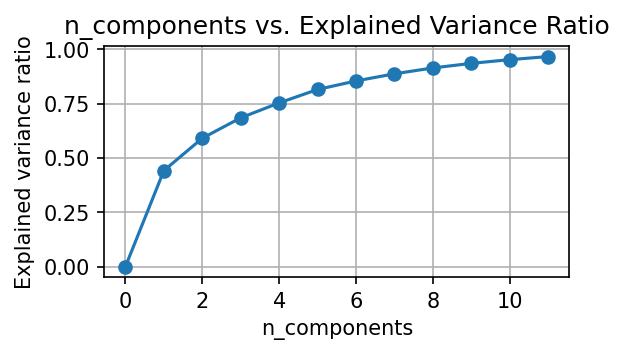

In [8]:
var_ratio = []
nums = np.arange(12)
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


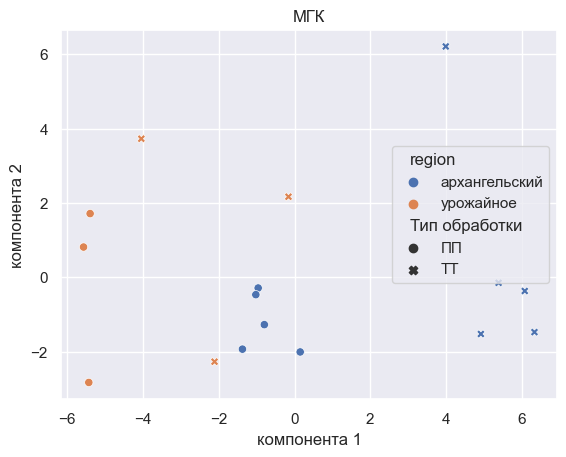

In [10]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(data_to_PCA)

n_components=5

pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pca_df, columns = [f'компонента {i}' for i in range(1,n_components + 1)])
pca_df = total_df.iloc[:,:2].join(pca_df) 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
# Plot 2D PCA Graph
sns.scatterplot(
    x='компонента 1', 
    y='компонента 2', 
    data=pca_df, 
    hue='region',
    style = 'Тип обработки'  ,
    legend=True
    )
 
plt.title('МГК')
plt.show()